<a href="https://colab.research.google.com/github/Vk9769/PRODIGY_GA_04/blob/main/Neural_style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [3]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [23]:
content_image = load_image('monet.jpeg')
style_image = load_image('park.jpeg')

In [24]:
content_image.shape

TensorShape([1, 221, 228, 3])

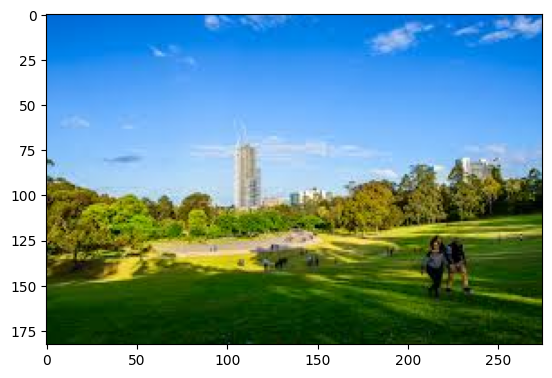

In [25]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [26]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

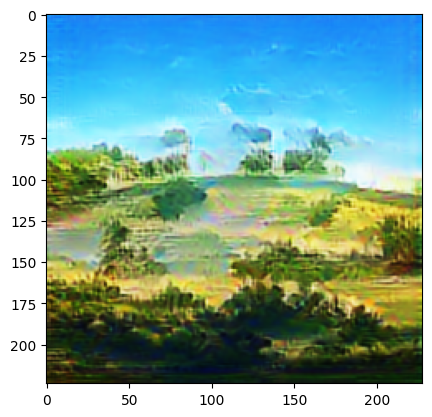

In [27]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [28]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True